# Guitar Chords v2 dataset analysis

This Jupyter Notebook aims to explore the characteristics of the Guitar Chords v2 dataset.

In [1]:
from pathlib import Path
from numpy.random import randint
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

### Random sample visualization 

Same samples have the chord played string by string

In [2]:
original_dataset_path = Path('../datasets/guitar_chords_v2/original_test_set/audio_files/')
lst_audio_paths = list(original_dataset_path.iterdir())

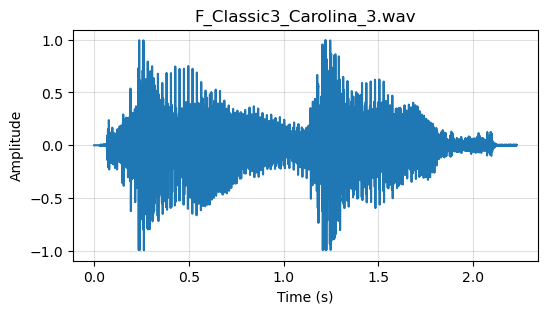

In [3]:
filepath  = lst_audio_paths[randint(0, len(lst_audio_paths)-1)]
audio, sr = sf.read(filepath)

try:
    audio = audio[:, 0]
except:
    pass

fig = plt.figure(figsize=(6, 3))
plt.plot(np.arange(len(audio))/sr, audio)
plt.title(filepath.name)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.4)
plt.show()

Audio(data=audio, rate=sr)

### How many WAV files in the dataset?

In [4]:
lenghts      = []
sample_rates = []
channels     = []
depths       = []

for filepath in lst_audio_paths:
    wavfile = sf.SoundFile(filepath)
    lenghts.append(len(wavfile))
    sample_rates.append(wavfile.samplerate)
    channels.append(wavfile.channels)
    depths.append(wavfile.subtype)

In [5]:
print('The dataset has {} audio files.'.format(len(lst_audio_paths)))

The dataset has 320 audio files.


### Do they all have one single channel?

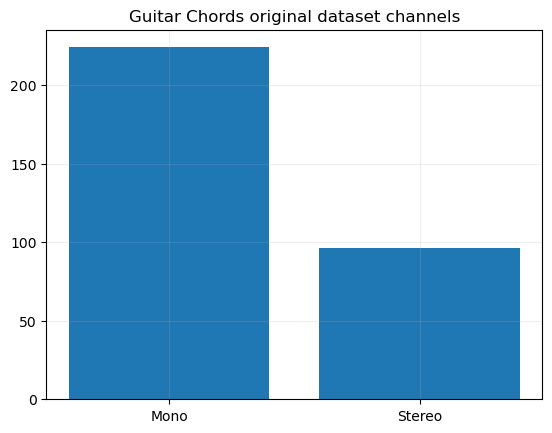

In [6]:
channel_bars = np.unique(channels, return_counts=True)

plt.bar(channel_bars[0], channel_bars[1])
plt.title('Guitar Chords original dataset channels')
plt.xticks([1, 2], ['Mono', 'Stereo'])
plt.grid(alpha=0.2)
plt.show()

### Do they all have the same sample rate?

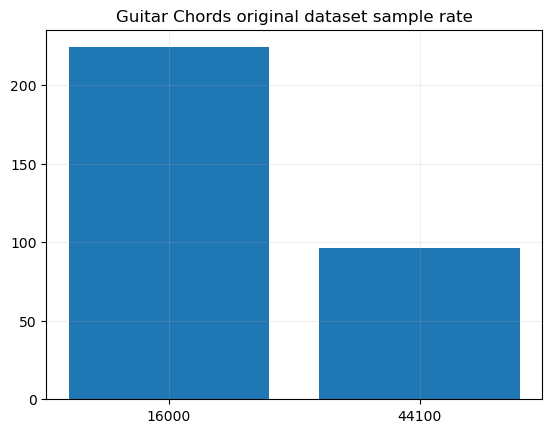

In [7]:
sr_bars = np.unique(sample_rates, return_counts=True)

plt.bar(np.arange(len(sr_bars[0])), sr_bars[1])
plt.title('Guitar Chords original dataset sample rate')
plt.xticks(np.arange(len(sr_bars[0])), sr_bars[0])
plt.grid(alpha=0.2)
plt.show()

### Do they all have the same lenght? 

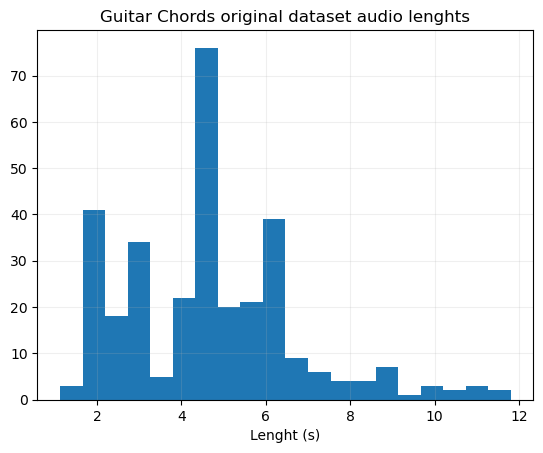

In [8]:
durations = np.array(lenghts)/np.array(sample_rates)

plt.hist(durations, bins=20)
plt.title('Guitar Chords original dataset audio lenghts')
plt.xlabel('Lenght (s)')
plt.grid(alpha=0.2)
plt.show()

### Do they all have the same bit depth?

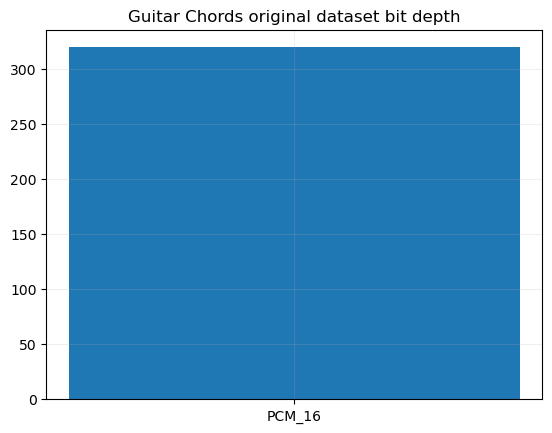

In [9]:
depth_bars = np.unique(depths, return_counts=True)

plt.bar(np.arange(len(depth_bars[0])), depth_bars[1])
plt.title('Guitar Chords original dataset bit depth')
plt.xticks(np.arange(len(depth_bars[0])), depth_bars[0])
plt.grid(alpha=0.2)
plt.show()